In [44]:
# Question 1
# Within a single dataset, the standard deviation measures the dispersion of individual data points. It provides an 
# indicator of the general variability in the dataset by expressing the degree to which the data points deviate from 
# the average. The standard error of the mean is more concerned with the variability of sample means than with 
# specific data points. It indicates how much variation you would expect in the means if you took many samples 
# from the same population and calculated their averages. Because bigger samples typically yield more 
# accurate estimates of the population mean, the standard error of the mean lowers as sample size grows, providing 
# an indication of how wellthe sample mean represents the true population mean. 

In [2]:
# Question 2 
# To create a 95% confidence interval using the SEM, you start by calculating the mean of your sample. Next, 
# determine the SEM, which is the standard deviation of the sample divided by the square root of the sample size. 
# If bootstrapping, the SEM would be the standard deviation of the bootstrapped sample means. For a 95% confidence 
# interval, in a normal distribution, 95% of the data falls within 1.96 standard deviations from the mean. The 
# margin of error is calculated by multiplying the SEM by 1.96. The confidence interval is found by adding and 
# subtracting this margin of error from the sample mean. This will create a range that will cover 95% of the 
# bootstrapped sample means. This interval gives you an estimate of where the true population mean is likely to lie,
# assuming that the sample mean’s distribution is approximately normal.

In [1]:
# Question 3
# To create a 95% bootstrapped confidence interval using the bootstrapped sample means directly, without calculating
# the standard error, you can use the percentile method. Generate a large number of bootstrapped samples from the 
# original data and calculate the mean for each resample. Then, to create the 95% confidence interval, find the 
# 2.5th percentile and the 97.5th percentile of the bootstrapped means (these percentiles are the lower and upper 
# bounds of the confidence interval). 

In [3]:
# Question 4 
import numpy as np

def bootstrap_ci(data, statistic_func, num_resamples=1000, confidence_level=0.95):
    """
    Compute a bootstrap confidence interval for a given statistic.

    Parameters:
    data (array-like): The sample data.
    statistic_func (function): The function that computes the statistic (e.g., np.mean or np.median).
    num_resamples (int): The number of bootstrap resamples to generate.
    confidence_level (float): The confidence level for the interval (default is 0.95 for a 95% CI).

    Returns:
    tuple: The lower and upper bounds of the confidence interval.
    """
    resampled_statistics = []

    for i in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True) 
        resampled_statistics.append(statistic_func(resample)) 

    lower_bound = np.percentile(resampled_statistics, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(resampled_statistics, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

data = np.random.normal(loc=50, scale=10, size=100) 
ci_mean = bootstrap_ci(data, np.mean)
print(f"95% Bootstrap CI for the mean: {ci_mean}")

ci_median = bootstrap_ci(data, np.median)
print(f"95% Bootstrap CI for the median: {ci_median}")

# https://chatgpt.com/share/66fcb0ce-c44c-8010-bdac-3e33fc255a82

95% Bootstrap CI for the mean: (47.075645683579076, 51.01937644435138)
95% Bootstrap CI for the median: (46.9093496973768, 51.313559329657316)


In [4]:
# Question 5 
# A population parameter is a fixed and unknown value that describes the attributes of a population. While a sample
# statistic is a measurable value from a sample. One needs to distinguish between the population parameter and the 
# sample statistic when dealing with confidence intervals because they represent different parts of the data. Since
# one rarely has access to an entire population, confidence intervals help infer the likely range where the 
# population parameter lies, based on the sample statistic. This distinction is important because the confidence 
# interval quantifies the uncertainty in estimating the population, acknowledging the inherent variance in sample 
# statistics in different samples.


In [5]:
# Question 6
# 1.
# You take a sample from the population. Then, create many new samples by randomly picking data points from 
# your original sample, allowing repeats (resampling with replacement).

# 2. Bootstrapping is used to estimate the properties of a population when it's difficult to sample the entire 
# population. Instead of repeatedly sampling from the population, we take one sample and treat it as if it 
# represents the whole population.

#3. To assess whether your hypothesized population mean is plausible using bootstrapping, you start by taking the 
# sample of size and calculating its sample mean. Then, generate many bootstrap samples by repeatedly resampling 
# from your original sample with replacement. For each bootstrap sample, calculate the mean, which results in a 
# distribution of sample means. You then compare the hypothesized mean to this distribution. If the hypothesized 
# mean falls within a typical range of the bootstrap distribution (like within a 95% confidence interval) it 
# suggests the hypothesis is plausible. If it lies outside this range, it indicates that the hypothesized mean may 
# not be consistent with the data from the sample.

In [6]:
# Question 7
# A confidence interval overlapping zero means that the range of possible true population values includes zero, 
# because even though the observed sample mean is not zero, the fact that zero is within the confidence interval 
# means there is not enough evidence to confidently say that the true effect is not zero, which leads to the 
# failure to reject the null hypothesis. If the confidence interval does not include zero, this would indicate that 
# the true population mean is probably not zero, leading to the rejection of the null hypothesis.

In [8]:
# Question 8
# This investigation aims to assess the efficacy of a recently developed vaccine by AliTech. Our objective is to 
# ascertain whether there is a statistically significant difference between the initial and final health scores of 
# patients who got the vaccination. This will provide evidence either in favor of or against the null hypothesis of
# "no effect."

#The null hypothesis (H₀) in this case indicates that the vaccination has no impact on the patients' health scores.
# This implies that any observed variations between the starting and finishing health scores can be more accurately
# ascribed to chance than to the vaccination. By examining the information gathered from patients both before and 
# after immunization, we will test this theory.

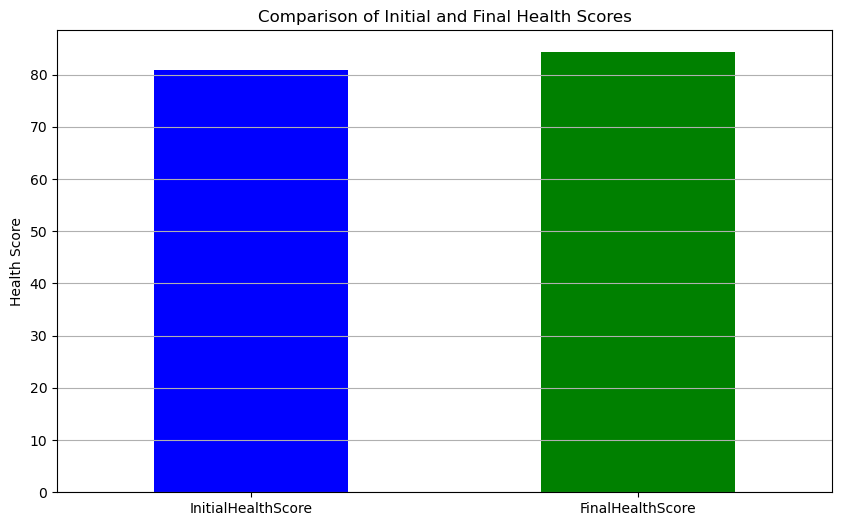

In [35]:
# Data Visualization:

import pandas as pd

data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

plt.figure(figsize=(10, 6))
data[['InitialHealthScore', 'FinalHealthScore']].mean().plot(kind='bar', color=['blue', 'green'])
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Observed Difference in Means: 3.299999999999997


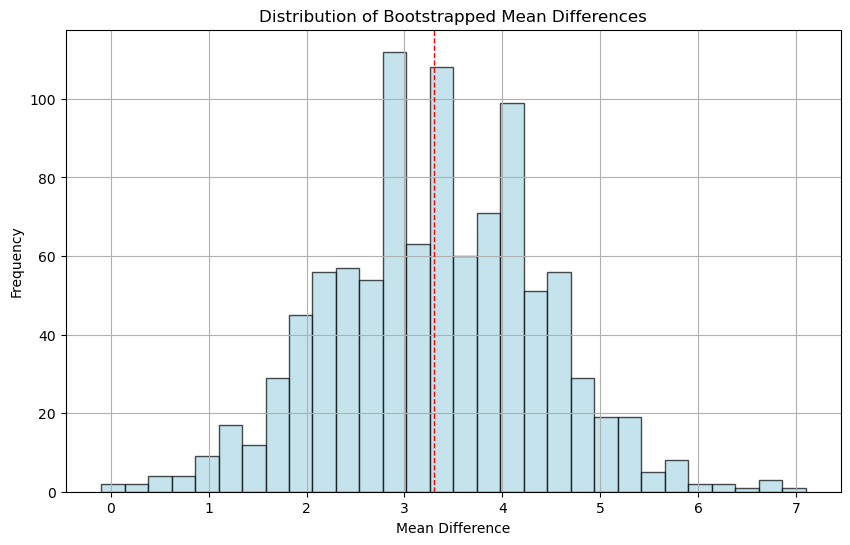

95% Confidence Interval: [1.2000000000000028, 5.3999999999999915]


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

def bootstrap_diff_means(data, n_iterations=1000):
    initial_scores = data['InitialHealthScore'].values
    final_scores = data['FinalHealthScore'].values
 
    observed_diff = np.mean(final_scores) - np.mean(initial_scores)
   
    bootstrapped_diffs = []
    
    for _ in range(n_iterations):
        boot_initial = np.random.choice(initial_scores, size=len(initial_scores), replace=True)
        boot_final = np.random.choice(final_scores, size=len(final_scores), replace=True)
        boot_diff = np.mean(boot_final) - np.mean(boot_initial)
        bootstrapped_diffs.append(boot_diff)
    
    return observed_diff, bootstrapped_diffs

observed_diff, bootstrapped_diffs = bootstrap_diff_means(data)
print("Observed Difference in Means:", observed_diff)

plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_diffs, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Bootstrapped Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.grid()
plt.show()

lower_bound = np.percentile(bootstrapped_diffs, 2.5)
upper_bound = np.percentile(bootstrapped_diffs, 97.5)

print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")


In [41]:
# Import Libraries:
    # Import the required libraries for data manipulation, numerical calculations, and visualization.
# Manual Data Entry:
    # Create a DataFrame directly in the code, simulating the content of your CSV file.
# Bootstrapping Function:
    # Define a function to calculate the observed difference in means between the initial and final health scores using bootstrapping.
# Run Analysis:
    # Call the bootstrapping function, storing the observed difference and bootstrapped differences.
# Visualization:
    # Create a histogram of the bootstrapped mean differences, highlighting the observed mean difference with a dashed line.
# Confidence Interval Calculation:
    # Calculate and display the 95% confidence interval based on the bootstrapped differences.

In [42]:
# If the confidence interval does not include zero, we reject the null hypothesis of "no effect" based on the 
# bootstrapping technique, indicating that the vaccine significantly improves patients' health scores.

# The short sample size and absence of confounding variable control places restrictions on this analysis. To 
# further assess the vaccine's efficacy, future research could profit from a bigger dataset and a controlled 
# experimental setup.

In [39]:
# https://chatgpt.com/share/66fcc731-d554-8010-b299-45319828d35d

In [40]:
# Question 9
# Yes.